# TensoFlow using MobileNetV2

In [1]:
'''Transfer learning is a very important concept in the field of computer vision and natural language processing. 
Using transfer learning you can use pre trained model and customize it for your needs. This saves computation 
time and money. It has been a revolutionary break through in the field of deep learning and nowadays you see it 
being used widely in the industry.'''


'Transfer learning is a very important concept in the field of computer vision and natural language processing. \nUsing transfer learning you can use pre trained model and customize it for your needs. This saves computation \ntime and money. It has been a revolutionary break through in the field of deep learning and nowadays you see it \nbeing used widely in the industry.'

In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


ModuleNotFoundError: No module named 'tensorflow.core.kernels'

In [ ]:
IMAGE_SHAPE =(224,224)


classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [ ]:
IMAGE_SHAPE+(3,)

In [ ]:
gold_fish = Image.open('goldFish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [31]:
# scale and normalize the image 

gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [32]:
gold_fish

array([[[0.21568627, 0.69019608, 0.23137255],
        [0.22352941, 0.71764706, 0.22352941],
        [0.22745098, 0.73333333, 0.22745098],
        ...,
        [0.16470588, 0.25490196, 0.2       ],
        [0.17254902, 0.34901961, 0.17647059],
        [0.18823529, 0.60784314, 0.21960784]],

       [[0.21176471, 0.70588235, 0.20784314],
        [0.21176471, 0.70980392, 0.20392157],
        [0.19215686, 0.68235294, 0.19215686],
        ...,
        [0.08235294, 0.16078431, 0.1254902 ],
        [0.12156863, 0.24313725, 0.12941176],
        [0.18039216, 0.5254902 , 0.17254902]],

       [[0.16078431, 0.65098039, 0.16078431],
        [0.12941176, 0.59215686, 0.14509804],
        [0.12156863, 0.58039216, 0.17254902],
        ...,
        [0.09411765, 0.17647059, 0.12941176],
        [0.11372549, 0.21176471, 0.1254902 ],
        [0.17647059, 0.45882353, 0.15686275]],

       ...,

       [[0.14901961, 0.09803922, 0.16470588],
        [0.16470588, 0.11764706, 0.18039216],
        [0.18823529, 0

In [33]:
# Adding one more dimension because we using only picture here... if are using complete dataset then this step is 
# not necessary

gold_fish[np.newaxis,...].shape

(1, 224, 224, 3)

In [34]:
# It means that we are adding new class in our pre-trained model

result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 0s 464ms/step


(1, 1001)

In [35]:
result

array([[ 0.16839077,  1.6209148 ,  9.0280075 , ..., -1.1316181 ,
        -0.16427678,  0.24511229]], dtype=float32)

In [36]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [37]:
# Getting image labels from file

image_labels = []

with open("ImageNetLabels.txt","r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]    

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [38]:
image_labels[predicted_label_index]

'goldfish'

In [39]:
# Loading flowers dataset

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 12s 0us/step


In [40]:
data_dir

'./datasets/flower_photos'

In [41]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [42]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/3102535578_ec8c12a7b6_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5180896559_b8cfefc21e.jpg'),
 PosixPath('datasets/flower_photos/roses/5497730366_44d758d8f5.jpg'),
 PosixPath('datasets/flower_photos/roses/4625089819_55c45a189c.jpg'),
 PosixPath('datasets/flower_photos/roses/1446097778_97149b8362.jpg')]

In [43]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [44]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3102535578_ec8c12a7b6_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5180896559_b8cfefc21e.jpg'),
 PosixPath('datasets/flower_photos/roses/5497730366_44d758d8f5.jpg'),
 PosixPath('datasets/flower_photos/roses/4625089819_55c45a189c.jpg'),
 PosixPath('datasets/flower_photos/roses/1446097778_97149b8362.jpg')]

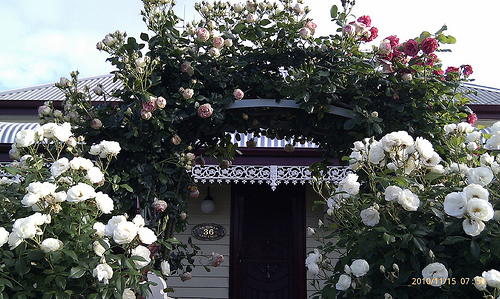

In [45]:
Image.open(str(roses[1]))

In [47]:
sunflowers = list(data_dir.glob('sunflowers/*'))
sunflowers[:5]

[PosixPath('datasets/flower_photos/sunflowers/16988605969_570329ff20_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/2706304885_4916102704_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3568925290_faf7aec3a0.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9302733302_2cb92cf275.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/20183028616_beb937e75c_m.jpg')]

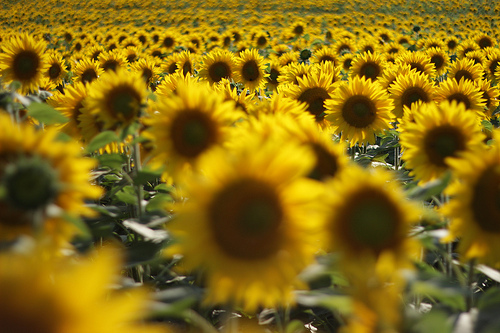

In [49]:
Image.open(str(sunflowers[3]))

In [56]:
# Making a dictionary to store the class labels for training purpose

flowers_images_dict ={
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
    
    
}

In [57]:
flowers_images_disct['roses']

[PosixPath('datasets/flower_photos/roses/3102535578_ec8c12a7b6_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5180896559_b8cfefc21e.jpg'),
 PosixPath('datasets/flower_photos/roses/5497730366_44d758d8f5.jpg'),
 PosixPath('datasets/flower_photos/roses/4625089819_55c45a189c.jpg'),
 PosixPath('datasets/flower_photos/roses/1446097778_97149b8362.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14597445311_8acb60247e.jpg'),
 PosixPath('datasets/flower_photos/roses/8926641787_d2515dfe8f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6347846687_3f0a7c3176.jpg'),
 PosixPath('datasets/flower_photos/roses/5089363428_2c5a1272ea.jpg'),
 PosixPath('datasets/flower_photos/roses/3971662839_5cb2963b20_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8983268106_dc913d17d8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5835539224_75967fc400_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8562144481_1d629848ff.jpg'),
 PosixP

In [58]:
flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [60]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/3102535578_ec8c12a7b6_m.jpg'

In [63]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 180, 3)

In [64]:
img

array([[[ 96, 100, 129],
        [ 96, 100, 128],
        [ 98, 103, 128],
        ...,
        [ 55,  60,  85],
        [ 57,  59,  83],
        [ 58,  59,  80]],

       [[ 97, 101, 129],
        [ 98, 102, 130],
        [ 99, 104, 129],
        ...,
        [ 56,  61,  86],
        [ 58,  60,  84],
        [ 58,  58,  82]],

       [[ 99, 103, 131],
        [100, 105, 130],
        [101, 107, 130],
        ...,
        [ 59,  63,  88],
        [ 60,  61,  87],
        [ 62,  61,  87]],

       ...,

       [[ 94,  89, 118],
        [106, 103, 129],
        [119, 118, 144],
        ...,
        [  0,   0,   0],
        [  0,   1,   1],
        [  0,   1,   2]],

       [[ 78,  73, 102],
        [121, 117, 146],
        [ 96,  93, 119],
        ...,
        [  5,   4,   6],
        [  5,   7,   8],
        [  4,   7,  11]],

       [[107, 102, 131],
        [107, 103, 132],
        [ 99,  96, 122],
        ...,
        [  6,   5,   7],
        [  7,   8,  12],
        [  6,   9,  13]]

In [66]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [69]:
X, y = [],[]

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [72]:
X = np.array(X)
y = np.array(y)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [74]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

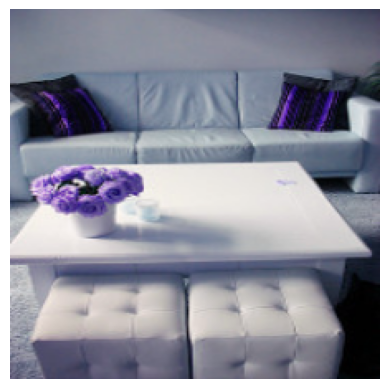

In [76]:
plt.axis('off')
plt.imshow(X[0])

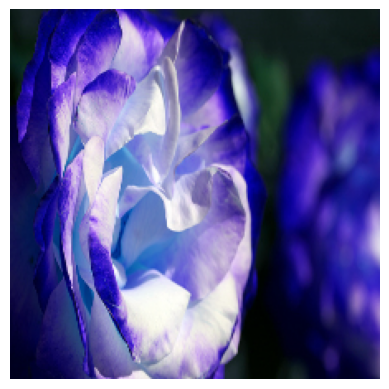

In [77]:
plt.axis('off')
plt.imshow(X[3])

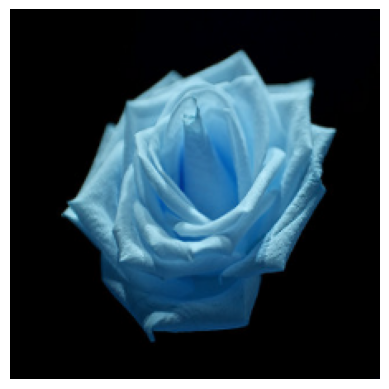

In [78]:
plt.axis('off')
plt.imshow(X[5])

In [83]:
pred_val = classifier.predict(np.array([X[0],X[1],X[2], X[3]]))
pred_val = np.argmax(pred_val, axis=1)    
pred_val

1/1 [==============================] - 0s 95ms/step


array([722, 795, 722, 795])

In [84]:
image_labels[722]

'pillow'

In [85]:
image_labels[795]

'shower curtain'

In [87]:
# Trainable = False means freezing last year
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224,224,3), trainable=False)

In [88]:
num_of_flowers = 5

model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [89]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 61s 681ms/step - loss: 0.8379 - accuracy: 0.6853
Epoch 2/10
86/86 [==============================] - 55s 642ms/step - loss: 0.4228 - accuracy: 0.8517
Epoch 3/10
86/86 [==============================] - 56s 651ms/step - loss: 0.3305 - accuracy: 0.8924
Epoch 4/10
86/86 [==============================] - 58s 674ms/step - loss: 0.2740 - accuracy: 0.9164
Epoch 5/10
86/86 [==============================] - 56s 652ms/step - loss: 0.2386 - accuracy: 0.9281
Epoch 6/10
86/86 [==============================] - 54s 630ms/step - loss: 0.2116 - accuracy: 0.9360
Epoch 7/10
86/86 [==============================] - 57s 669ms/step - loss: 0.1866 - accuracy: 0.9528
Epoch 8/10
86/86 [==============================] - 58s 679ms/step - loss: 0.1662 - accuracy: 0.9597
Epoch 9/10
86/86 [==============================] - 57s 657ms/step - loss: 0.1488 - accuracy: 0.9666
Epoch 10/10
86/86 [==============================] - 61s 708ms/step - loss: 0.1351 - accura

In [90]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 21s 712ms/step - loss: 0.3551 - accuracy: 0.8791


[0.35513415932655334, 0.8790849447250366]